In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

In [2]:
def get_events(tstamp,state, type):
    if type == "UP":
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==1,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events
    elif type == 'DOWN':
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==0,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events        
    elif type == "BOTH":
        mask = np.concatenate((np.array([False]),state[1:]!=state[:-1]))
        events = tstamp[mask]
        return events
    else:
        return None

In [ ]:
# generate numpy data from the raw csv for further processing
fname = './XENOMAI/no_stress/untitled.csv'
no_stress_data = np.genfromtxt(fname,delimiter = ',', skip_header = 1);
np.save('xeno_no_stress_raw',no_stress_data);

fname = './XENOMAI/stress/untitled.csv';
stress_data = np.genfromtxt(fname,delimiter = ',', skip_header = 1);
np.save('xeno_stress_raw',stress_data);

In [ ]:
# read up the preprocessed data
no_stress_data = np.load('./XENOMAI/xeno_no_stress_raw.npy');
stress_data = np.load('./XENOMAI/xeno_stress_raw.npy');

In [ ]:
pps1_events = np.array([])
pps2_events = np.array([])
user_events = np.array([])

raw_ts = no_stress_data[:,0];
raw_pps = no_stress_data[:,2];
raw_user = no_stress_data[:,1];

# delete the first invalid signals
raw_data = [raw_pps, raw_user]

pps_event =  get_events(raw_ts,raw_pps,'UP');
user_event = get_events(raw_ts,raw_user,'BOTH');
first_pps = pps_event[0];
user_event = user_event[user_event > first_pps];

event_cnt = min(len(pps_event),len(user_event));
pps_event = pps_event[0:event_cnt-1];
user_event = user_event[0:event_cnt-1];
dif_no_stress = (user_event - pps_event)*1e6;

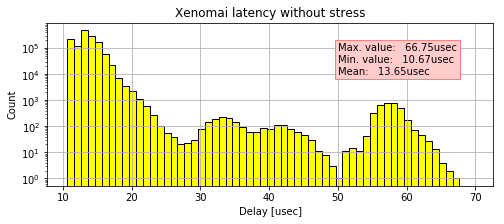

In [11]:
figure(figsize=(8,3))
h_min = np.min(dif_no_stress)
hist(dif_no_stress,bins=np.arange(h_min,70,1),edgecolor='k',Color='yellow')
grid();
title('Xenomai latency without stress')
xlabel('Delay [usec]')
ylabel('Count')

dist_max = np.max(dif_no_stress);
dist_min = np.min(dif_no_stress);
dist_mean = np.mean(dif_no_stress);

text(50,10000,'Max. value:   %.2fusec\nMin. value:   %.2fusec\nMean:   %.2fusec' % (dist_max, dist_min, dist_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc=(1., 0.8, 0.8)))
yscale('log')

In [18]:
pps1_events = np.array([])
pps2_events = np.array([])
user_events = np.array([])

raw_ts = stress_data[:,0];
raw_pps = stress_data[:,2];
raw_user = stress_data[:,1];

# delete the first invalid signals
raw_data = [raw_pps, raw_user]

pps_event =  get_events(raw_ts,raw_pps,'UP');
user_event = get_events(raw_ts,raw_user,'BOTH');
first_pps = pps_event[0];
user_event = user_event[user_event > first_pps];

event_cnt = min(len(pps_event),len(user_event));
pps_event = pps_event[0:event_cnt-1];
user_event = user_event[0:event_cnt-1];
dif_stress = (user_event - pps_event)*1e6;

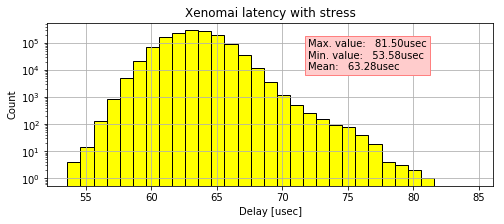

In [23]:
figure(figsize=(8,3))
h_min = np.min(dif_stress)
hist(dif_stress,bins=np.arange(h_min,85,1),edgecolor='k',Color='yellow')
grid();
title('Xenomai latency with stress')
xlabel('Delay [usec]')
ylabel('Count')

dist_max = np.max(dif_stress);
dist_min = np.min(dif_stress);
dist_mean = np.mean(dif_stress);

text(72,10000,'Max. value:   %.2fusec\nMin. value:   %.2fusec\nMean:   %.2fusec' % (dist_max, dist_min, dist_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc=(1., 0.8, 0.8)))
yscale('log')

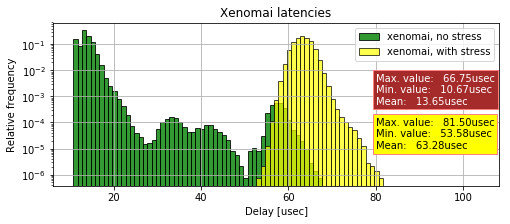

In [59]:
figure(figsize=(8,3))
h_min = min(min(dif_stress),min(dif_no_stress))
h_max = 104 #max(max(dif_stress),max(dif_no_stress))
hist(dif_no_stress, bins = np.arange(h_min-5, h_max, 1), density = True, alpha = 0.8, label = 'xenomai, no stress',edgecolor='k',Color='green')
hist(dif_stress, bins = np.arange(h_min-5, h_max, 1), density = True, alpha = 0.7, label='xenomai, with stress',edgecolor='k',Color='yellow')
title ('Xenomai latencies');
xlabel('Delay [usec]');
ylabel('Relative frequency');
yscale('log');
legend();
grid();

dist_max = np.max(dif_stress);
dist_min = np.min(dif_stress);
dist_mean = np.mean(dif_stress);
text(80,1e-5,'Max. value:   %.2fusec\nMin. value:   %.2fusec\nMean:   %.2fusec' % (dist_max, dist_min, dist_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc=(1., 1.0, 0.0)))

dist_max = np.max(dif_no_stress);
dist_min = np.min(dif_no_stress);
dist_mean = np.mean(dif_no_stress);

text(80,0.5e-3,'Max. value:   %.2fusec\nMin. value:   %.2fusec\nMean:   %.2fusec' % (dist_max, dist_min, dist_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc="brown"),Color = 'white')

savefig('./XENOMAI/xenomai_comp.png',bbox_inches = "tight")

In [37]:
np.save('./XENOMAI/xeno_stress',dif_stress);
np.save('./XENOMAI/xeno_no_stress',dif_no_stress);